In [1]:
import pandas as pd
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = open("../datasets/llm/names.txt",mode="r",encoding="utf8").read().splitlines()

In [3]:
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
bigrams = {}
for word in names:
    word = "." + word + "."
    for ch1,ch2 in zip(word,word[1:]):
        bigrams[ch1,ch2] = bigrams.get((ch1,ch2),0) + 1

In [5]:
bigrams = dict(sorted(bigrams.items(),key= lambda x:x[1],reverse=True))

In [6]:
[x for x in bigrams.items()][:5]

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983)]

In [7]:
import torch

bigramModel = torch.zeros(27,27)
bigramModel.shape
uniques = set(x for x in "".join(word for word in names+["."]))
uniques = dict([(x,i) for i,x in enumerate(sorted(uniques))])
rev_uniques = dict([value,keys] for keys,value in uniques.items())
uniques, rev_uniques

({'.': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 {0: '.',
  1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z'})

In [8]:
for x in bigrams.keys():
    bigramModel[uniques[x[0]],uniques[x[1]]] = bigrams[x]

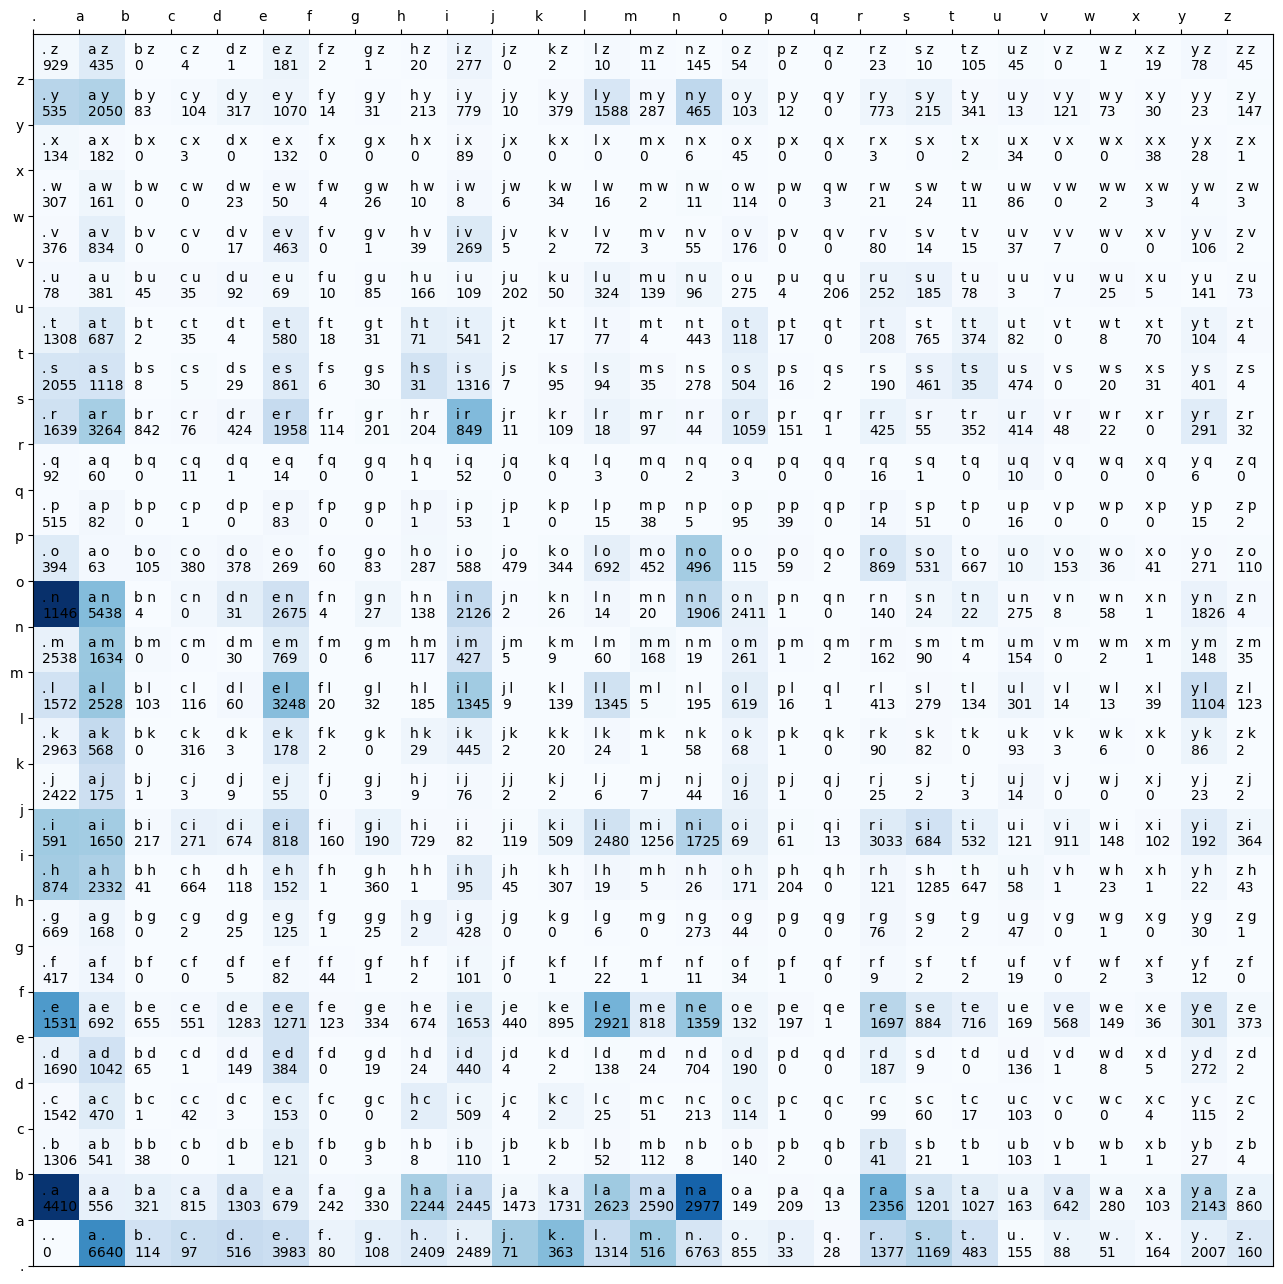

In [9]:
fig,axes = plt.subplots()
fig.set_figheight(16)
fig.set_figwidth(16)
axes.pcolormesh(bigramModel,cmap="Blues")
axes.set_xticks(list(uniques.values()),list(uniques.keys()))
axes.tick_params(axis="x",top = True,bottom=False,labeltop = True,labelbottom = False)
for x in range(bigramModel.shape[0]):
    for y in range(bigramModel.shape[1]):
        axes.annotate(f"{rev_uniques[x]} {rev_uniques[y]}\n{bigramModel[x,y].item():.0f}",(x+.2,y+.2))
axes.set_yticks(list(uniques.values()),list(uniques.keys()))
plt.show()